In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow_datasets as tfds

In [3]:
(train_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:]'],
    shuffle_files = True,
    with_info=True,
    as_supervised=True,
)

print(metadata)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteZPM00F/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-t

In [4]:
len(train_ds), len(test_ds)

(16283, 6979)

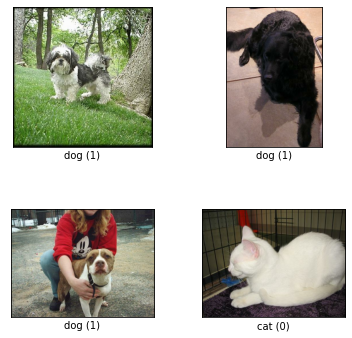

In [ ]:
fig = tfds.show_examples(train_ds, metadata, rows=2, cols=2)

In [5]:
def normalize_img(image, label):
  return (tf.cast(image, tf.float32) / 255.0, label)

def resize_img(image, label):
  return (tf.image.resize(image, (128, 128)), label)
 

In [6]:
# Training Dataset
train_ds = train_ds.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

SHUFFLE_VAL = 1000
train_ds = train_ds.shuffle(SHUFFLE_VAL)
BATCH_SIZE = 64
train_ds = train_ds.batch(BATCH_SIZE)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE) 

In [7]:
# Test Dataset
test_ds = test_ds.map(resize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [8]:
# Building the Model

model = keras.Sequential(
    [
     keras.Input(shape=(128, 128, 3)),
     layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv_1'),
     layers.MaxPooling2D(pool_size=(2,2), name='p_1'),
     layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='conv_2'),
     layers.MaxPooling2D(pool_size=(2,2), name='p_2'),
     layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='conv_3'),
     layers.MaxPooling2D(pool_size=(2,2), name='p_3'),
     layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', name='conv_4'),
     layers.MaxPooling2D(pool_size=(2,2), name='p_4'),
     layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', name='conv_5'),
     layers.Flatten(name='flat'),
     layers.Dense(1, activation='sigmoid', name='dense')   
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 p_1 (MaxPooling2D)          (None, 63, 63, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 61, 61, 64)        18496     
                                                                 
 p_2 (MaxPooling2D)          (None, 30, 30, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 28, 28, 128)       73856     
                                                                 
 p_3 (MaxPooling2D)          (None, 14, 14, 128)       0         
                                                                 
 conv_4 (Conv2D)             (None, 12, 12, 256)       2

In [9]:
from tensorflow import keras

model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer='adam')

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
255/255 [==============================] - 35s 100ms/step - loss: 0.6556 - val_loss: 0.5688
Epoch 2/10
255/255 [==============================] - 26s 99ms/step - loss: 0.5359 - val_loss: 0.4901
Epoch 3/10
255/255 [==============================] - 26s 98ms/step - loss: 0.4385 - val_loss: 0.4057
Epoch 4/10
255/255 [==============================] - 28s 104ms/step - loss: 0.3661 - val_loss: 0.3781
Epoch 5/10
255/255 [==============================] - 26s 98ms/step - loss: 0.3117 - val_loss: 0.3289
Epoch 6/10
255/255 [==============================] - 31s 119ms/step - loss: 0.2689 - val_loss: 0.3212
Epoch 7/10
255/255 [==============================] - 29s 104ms/step - loss: 0.2175 - val_loss: 0.3079
Epoch 8/10
255/255 [==============================] - 26s 98ms/step - loss: 0.1751 - val_loss: 0.3881
Epoch 9/10
255/255 [==============================] - 30s 111ms/step - loss: 0.1293 - val_loss: 0.3743
Epoch 10/10
255/255 [==============================] - 27s 101ms/step - loss:

In [12]:
layer = model.layers 
layer

In [13]:
model.layers[0]

In [14]:
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv_1 (3, 3, 3, 32)


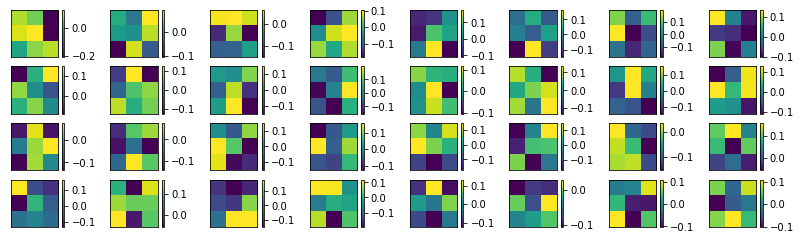

In [19]:
import matplotlib.pyplot as plt

fig1=plt.figure(figsize=(14, 4))
columns = 8
rows = 4
n_filters = columns * rows

for i in range(1, n_filters +1):
 
  f = filters[:, :, :, i-1]
  fig1 =plt.subplot(rows, columns, i)
  fig1.set_xticks([])  
  fig1.set_yticks([])
  plt.imshow(f[:, :, 0], cmap='viridis') 
  plt.colorbar()
plt.show()


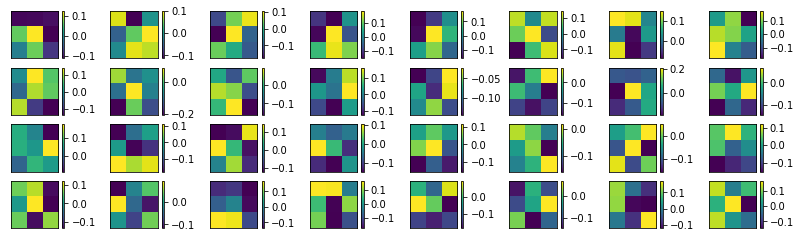

In [20]:
fig2=plt.figure(figsize=(14, 4))
columns = 8
rows = 4
n_filters = columns * rows

for i in range(1, n_filters +1):
  f = filters[:, :, :, i-1]
  fig1 =plt.subplot(rows, columns, i)
  fig1.set_xticks([]) 
  fig1.set_yticks([])
  plt.imshow(f[:, :, 1], cmap='viridis') 
  plt.colorbar()
plt.show()  

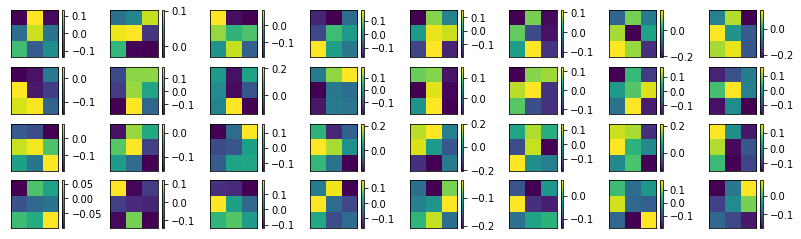

In [21]:
fig3=plt.figure(figsize=(14, 4))

columns = 8
rows = 4
n_filters = columns * rows

for i in range(1, n_filters +1):
 
  f = filters[:, :, :, i-1]
  fig1 =plt.subplot(rows, columns, i)
  fig1.set_xticks([])  
  fig1.set_yticks([])
  plt.imshow(f[:, :, 2], cmap='viridis')
  plt.colorbar()
plt.show()  

In [22]:
from tensorflow import keras
import numpy as np
img_path = keras.utils.get_file(
fname="cat.jpg",
origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
  
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  return array

img_tensor = get_img_array(img_path, target_size=(128, 128))

80329/80329 [==============================] - 0s 2us/step


In [ ]:
img_tensor.shape

(1, 128, 128, 3)

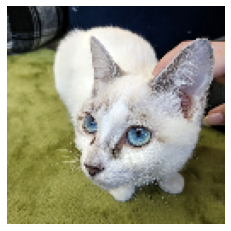

In [23]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [24]:
conv_layer_index = [0, 2, 4]  
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = keras.Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 p_1 (MaxPooling2D)          (None, 63, 63, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 61, 61, 64)        18496     
                                                                 
 p_2 (MaxPooling2D)          (None, 30, 30, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 28, 28, 128)       73856     
                                                                 
Total params: 93,248
Trainable params: 93,248
Non-trainable p

In [25]:
f_out = model_short.predict(img_tensor)

1/1 [==============================] - 0s 149ms/step


In [39]:
print(f_out[0].shape)
print(f_out[1].shape)
print(f_out[2].shape)

(1, 126, 126, 32)
(1, 61, 61, 64)
(1, 28, 28, 128)


In [36]:
c_1 = f_out[0].reshape(126, 126, 32)

In [37]:
c_1.shape

(126, 126, 32)

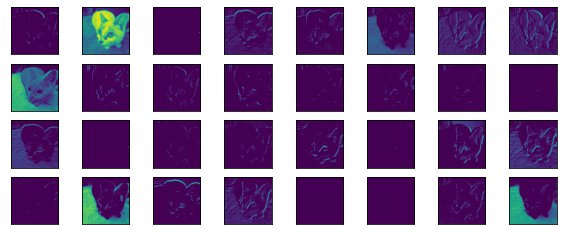

In [38]:
columns = 8
rows = 4

fig=plt.figure(figsize=(10, 4))

for i in range(1, columns*rows +1):
  
  fig =plt.subplot(rows, columns, i)
  fig.set_xticks([])  
  fig.set_yticks([])
  plt.imshow(c_1[:, :, i-1], cmap='viridis')     
plt.show()

In [40]:
c_2 = f_out[1].reshape(61, 61, 64)

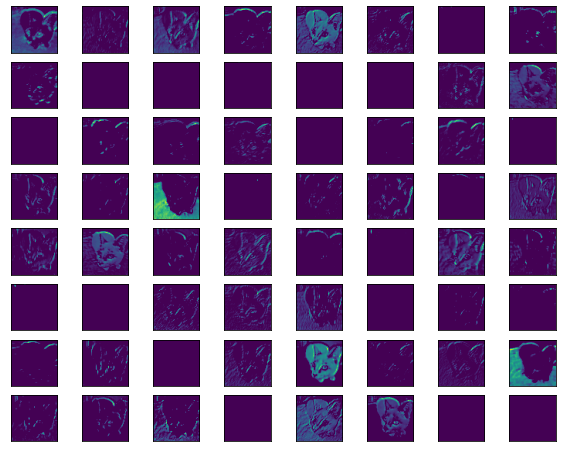

In [42]:
columns = 8
rows = 8

fig=plt.figure(figsize=(10, 8))

for i in range(1, columns*rows +1):
  
  fig =plt.subplot(rows, columns, i)
  fig.set_xticks([])  
  fig.set_yticks([])
  plt.imshow(c_2[:, :, i-1], cmap='viridis')
       
plt.show()